# **Credit Risk**


# **Credit Risk Dataset**

Credit default risk is the possibility that businesses/individuals are unable to make payments required of its debt obligations, which can generate a chance of loss for a lender. 
The main purpose of this analysis is to predict non-customers default. 

# Variables
1. **Nombre** description
2. **person_age** age
3. **person_income** annual income
4. **personhomeownership** home ownership (rent, owner,etc)
5. **personemplength** duration of employment (years)
6. **loan_intent** reason of the loan
7. **loan_grade** A,B,etc
8. **loan_amnt** amount 
9. **loanintrate** interest rate
10. **loan_status** status (0 no default, 1 default)
11. **loanpercentincome** Loan to Income Percentage
12. **cbpersondefaultonfile** history of default
13. **cbpresoncredhistlength** credit history.

In [ ]:
# libraries
# ==============================================================================
# !pip install pandas-profiling==3.0.0
!pip install scikit-learn
# ==============================================================================

# data
# ==============================================================================
import pandas as pd
import numpy as np
import math
import sys
# import pandas_profiling as pp
from pandas.core.frame import DataFrame

# grap
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# proc
# ==============================================================================
import random
import sklearn as sk
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from statsmodels.stats.weightstats import ttest_ind


# matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Data
# ==============================================================================

# upload data frame
from google.colab import drive
drive.mount('/content/drive')

df_r_credit = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/credit_risk_dataset.csv")

Mounted at /content/drive


# **EDA**

In [ ]:
df_r_credit.shape

In [ ]:
df_r_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df_r_credit.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
df_r_credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df_r_credit.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [ ]:
#  MISSINGS
# ==============================================================================

porc_nulos_tasa = df_r_credit.loan_int_rate.isnull().sum()/len(df_r_credit.loan_int_rate)*100
porc_nulos_antiguedad = df_r_credit.person_emp_length.isnull().sum()/len(df_r_credit.person_emp_length)*100

In [ ]:
print('El porcentaje de valores nulos para loan_int_rate es:')
print("{:.2f}".format(porc_nulos_tasa))
print('------------------------------------------------------')
print('El porcentaje de valores nulos para person_emp_length es:')
print("{:.2f}".format(porc_nulos_antiguedad))

El porcentaje de valores nulos para loan_int_rate es:
9.56
------------------------------------------------------
El porcentaje de valores nulos para person_emp_length es:
2.75


In [ ]:
# DESCRIPTIVE STATISTICS
# ==============================================================================

df_r_credit.describe(exclude=object)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
# ANALYSIS CATEGORICAL VARIABLES
# ================================================================================================

df_r_credit.describe(include = object).T 

,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


In [ ]:
#MISSING IN Lloan_int_rate
# ==============================================================================

#definiendo la media, medana y moda en la columna con Naan
mean_loan_int_rate = df_r_credit['loan_int_rate'].mean()
print("MEAN de loan_int_rate:","{:.2f}".format(mean_loan_int_rate))

median_loan_int_rate = df_r_credit['loan_int_rate'].median()
print("MEDIAN de loan_int_rate:","{:.2f}".format(median_loan_int_rate))

moda_loan_int_rate = df_r_credit['loan_int_rate'].mode()
print("MODE de loan_int_rate:", moda_loan_int_rate)
 
#Reemplazar NaNs en columna loan_int_ratecon media
df_r_credit['loan_int_rate'].fillna(value=mean_loan_int_rate, inplace=True)
print('---------------------------------------------')
print('NaNs have been replaced by Mean')

Media de loan_int_rate: 11.01
Mediana de loan_int_rate: 10.99
Moda de loan_int_rate: 0    7.51
dtype: float64
---------------------------------------------
Loas Nan han sido reemplazados por la Media


In [ ]:
#NULOS EN COLUMNA person_emp_length 
# ==============================================================================
#definiendo la media, mediana y moda en la columna con Naan
mean_person_emp_length  = df_r_credit['person_emp_length'].mean()
print("MEAN de person_emp_length:","{:.2f}".format(mean_person_emp_length))

median_person_emp_length  = df_r_credit['person_emp_length'].median()
print("MEDIAN de person_emp_length:","{:.2f}".format(median_person_emp_length))

moda_person_emp_length = df_r_credit['person_emp_length'].mode()
print("MODE de person_emp_length:", moda_person_emp_length)
 

#meadian_person_emp_length = df_r_credit1['person_emp_length'].median()
# print(person_emp_length)
 
#Reemplazar NaNs en columna person_emp_length con la mediana (tiene valores outliers)
df_r_credit['person_emp_length'].fillna(value=median_person_emp_length, inplace=True)
print('---------------------------------------------')
print('NaNs have been replaced by Median')

Media de person_emp_length: 4.77
Mediana de person_emp_length: 4.00
Moda de person_emp_length: 0    0.0
dtype: float64
---------------------------------------------
Loas Nan han sido reemplazados por la Mediana


In [ ]:
# CASTING 
# ==============================================================================
df_r_credit['loan_status']=df_r_credit['loan_status'].astype ('bool')
df_r_credit['cb_person_default_on_file']=(df_r_credit['cb_person_default_on_file'] == "Y").astype ('bool')
df_r_credit['person_income']=df_r_credit['person_income'].astype ('float64')
df_r_credit['person_emp_length']=df_r_credit['person_emp_length'].astype ('int64')

In [ ]:
#CATEGORICAL INTO ORDINAL

df_r_credit["loan_grade"] = df_r_credit["loan_grade"].astype('category')
df_r_credit["loan_grade"] = df_r_credit["loan_grade"].cat.codes

In [ ]:
# DUPLICATED VALUES
# ==============================================================================
df_r_credit[df_r_credit.duplicated()].shape

(165, 12)

In [ ]:
# DROP DUPLICATED VALUES -  unique combinations - 32416
df_r_credit = df_r_credit.drop_duplicates() 
print('---------------------------------------------')
print('The duplicated values have been deleted')

In [ ]:
df_r_credit.shape

(32416, 12)

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
# Descriptive statistics
# ==============================================================================
df_r_credit.describe(exclude=[object])

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32416.00,32416.00,32416.00,32416.00,32416.00,32416.00,32416,32416.00,32416,32416.00
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,25327,NaN,26686,NaN
mean,27.75,66091.64,4.77,1.22,9593.85,11.02,NaN,0.17,NaN,5.81
std,6.35,62015.58,4.09,1.17,6322.73,3.08,NaN,0.11,NaN,4.06
min,20.00,4000.00,0.00,0.00,500.00,5.42,NaN,0.00,NaN,2.00
25%,23.00,38542.00,2.00,0.00,5000.00,8.49,NaN,0.09,NaN,3.00
50%,26.00,55000.00,4.00,1.00,8000.00,11.01,NaN,0.15,NaN,4.00
75%,30.00,79218.00,7.00,2.00,12250.00,13.11,NaN,0.23,NaN,8.00


In [ ]:
# Analysis of categorical variables
# ================================================================================================
df_r_credit.describe(include = object).T 

,count,unique,top,freq
person_home_ownership,32416,4,RENT,16378
loan_intent,32416,6,EDUCATION,6411


# Profile Report of final data frame

In [ ]:
!pip install pandas-profiling==3.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 248 kB 35.9 MB/s 
     |████████████████████████████████| 3.1 MB 56.7 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 696 kB 79.7 MB/s 
     |████████████████████████████████| 102 kB 67.7 MB/s 
     |████████████████████████████████| 355 kB 75.0 MB/s 
     |████████████████████████████████| 296 kB 79.0 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=937a10d93d06b4383aa62008f611724e42833e8ba2250cfbcdcfe2aa36da63d5
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas-profiling
    Fo

In [ ]:
import pandas_profiling as pp

In [ ]:
pp.ProfileReport(df_r_credit)

# ANALYSIS OF FREQ. DEFAULTS

In [ ]:
# ANALYSIS OF FREQ. DEFAULTS
# ==============================================================================
#Frecuencias absolutas simples
pd.value_counts(df_r_credit['loan_status'])

False    25327
True      7089
Name: loan_status, dtype: int64

In [ ]:
#Simple relative frequencies
100 * df_r_credit['loan_status'].value_counts() / len(df_r_credit['loan_status'])

False   78.13
True    21.87
Name: loan_status, dtype: float64

In [ ]:
df_r_credit["loan_status"].value_counts().plot(kind="pie", autopct ="%.2f'", cmap= 'tab20c')

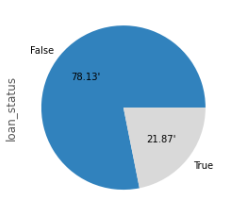

In [ ]:
# graph to see the distribution

total = float(len(df_r_credit))

ax = sns.countplot(x = "loan_status", data = df_r_credit, palette= "viridis")         
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

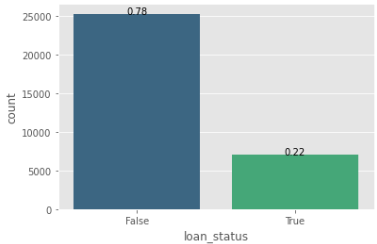

In [ ]:
#Make a Data Frame with rows where status is =1
Status_default= df_r_credit[df_r_credit["loan_status"]==1]
Status_default
#sum the amount of defaults
Suma_Monto_Default= sum(Status_default["loan_amnt"])
#ake a Data Frame with rows where status is =0
Status_No_default= df_r_credit[df_r_credit["loan_status"]==0]
Status_No_default
#sum the amount of no defaults
Suma_Monto_No_Default= sum(Status_No_default["loan_amnt"])
#check
print("Monto No Default=",Suma_Monto_No_Default)
print("Monto Default=", Suma_Monto_Default)

print("control", sum(df_r_credit["loan_amnt"]))
print("suma", Suma_Monto_No_Default +Suma_Monto_Default)


In [ ]:
# % amount of defaults (12 months)
porc_perd_monto = Suma_Monto_Default/sum(df_r_credit["loan_amnt"])
round(porc_perd_monto*100,2)

24.75

# Correlation Analysis

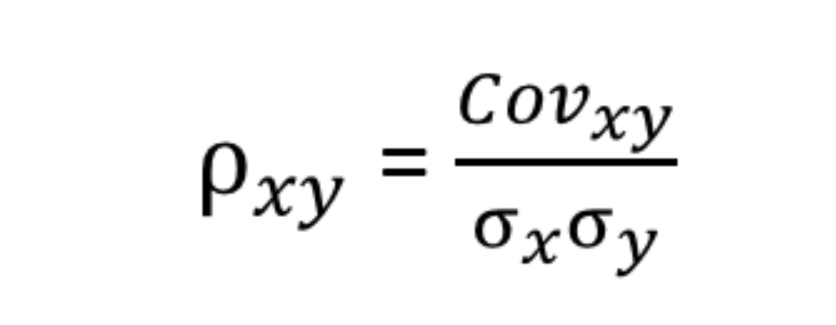

In [ ]:
# Correlation btw loan_status and the rest of variables
# ============================================================================

print('Correlacion loan_status - rys')
print('---------------------------------------------')
corr_loan_st = df_r_credit.corrwith(df_r_credit["loan_status"])

corr_loan_st

Correlacion loan_status - rys
---------------------------------------------


person_age                   -0.02
person_income                -0.15
person_emp_length            -0.08
loan_grade                    0.37
loan_amnt                     0.11
loan_int_rate                 0.32
loan_status                   1.00
loan_percent_income           0.38
cb_person_default_on_file     0.18
cb_person_cred_hist_length   -0.02
dtype: float64

In [ ]:
#sort the list
#======================================================================

print('Correlacion (ordenada) loan_status - rys')
print('---------------------------------------------')
corr_loan_st.sort_values(axis = 0, ascending = False)

Correlacion (ordenada) loan_status - rys
---------------------------------------------


loan_status                   1.00
loan_percent_income           0.38
loan_grade                    0.37
loan_int_rate                 0.32
cb_person_default_on_file     0.18
loan_amnt                     0.11
cb_person_cred_hist_length   -0.02
person_age                   -0.02
person_emp_length            -0.08
person_income                -0.15
dtype: float64

In [ ]:
#heatmap

sns.heatmap(df_r_credit.corr(), annot=True)

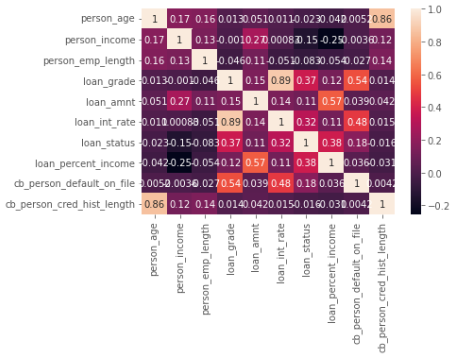

In the heatmap we can see that there is a strong relationship between the variables loan_grade (quality of debt) and loan_int_rate, the same is observed between the variable cb_person_cred_hist_length and person_age.

Given this situation, we resolve to eliminate the two variables cb_person_cred_hist_length and loan_int_rate.



In [ ]:
# drop variables wt hig correlation -  
# ============================================================================
df_r_credit = df_r_credit.drop(columns=['cb_person_cred_hist_length','loan_int_rate'], axis=1, inplace=False) 
print('---------------------------------------------')
print('Las columnas cb_person_cred_hist_length y loan_int_rate han sido eliminadas')

---------------------------------------------
Las columnas cb_person_cred_hist_length y loan_int_rate han sido eliminadas


In [ ]:
df_r_credit

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file
0,22,59000.00,RENT,123,PERSONAL,3,35000,True,0.59,True
1,21,9600.00,OWN,5,EDUCATION,1,1000,False,0.10,False
2,25,9600.00,MORTGAGE,1,MEDICAL,2,5500,True,0.57,False
3,23,65500.00,RENT,4,MEDICAL,2,35000,True,0.53,False
4,24,54400.00,RENT,8,MEDICAL,2,35000,True,0.55,True
...,...,...,...,...,...,...,...,...,...,...
32576,57,53000.00,MORTGAGE,1,PERSONAL,2,5800,False,0.11,False
32577,54,120000.00,MORTGAGE,4,PERSONAL,0,17625,False,0.15,False
32578,65,76000.00,RENT,3,HOMEIMPROVEMENT,1,35000,True,0.46,False
32579,56,150000.00,MORTGAGE,5,PERSONAL,1,15000,False,0.10,False


# outliers

In [ ]:
#  OUTLIERS - BoxPlot.
# ================================================================================================

# initialize figure with 4 subplots in a row
fig, ax1 = plt.subplots(1, 5, figsize=(12, 9))

# add padding between the subplots
plt.subplots_adjust(wspace=0.5) 

sns.boxplot(data=df_r_credit['person_age'], ax=ax1[0], color='tomato',)
ax1[0].set_xlabel('person_age')

sns.boxplot(data=df_r_credit['person_income'], ax=ax1[1], color='yellow')
ax1[1].set_xlabel('person_income')

sns.boxplot(data=df_r_credit['person_emp_length'], ax=ax1[2], color='lime')
ax1[2].set_xlabel('person_emp_length')

sns.boxplot(data=df_r_credit['loan_amnt'], ax=ax1[3], color='magenta')
ax1[3].set_xlabel(' loan_amnt')

sns.boxplot(data=df_r_credit['loan_percent_income'], ax=ax1[4], color='blue')
ax1[4].set_xlabel(' loan_percent_income')

# by default, you'll see x-tick label set to 0 in each subplot
# remove it by setting it to empty list
for subplot in ax1:
    subplot.set_xticklabels([])
    
plt.show()

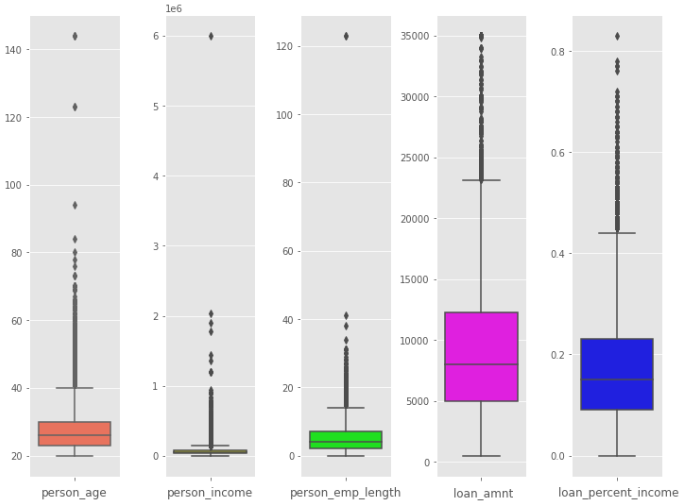

In [ ]:
# Descriptive statistics
# ==============================================================================

df_r_credit.describe(exclude=[object])

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file
count,32416.00,32416.00,32416.00,32416.00,32416.00,32416,32416.00,32416
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,2
top,NaN,NaN,NaN,NaN,NaN,False,NaN,False
freq,NaN,NaN,NaN,NaN,NaN,25327,NaN,26686
mean,27.75,66091.64,4.77,1.22,9593.85,NaN,0.17,NaN
std,6.35,62015.58,4.09,1.17,6322.73,NaN,0.11,NaN
min,20.00,4000.00,0.00,0.00,500.00,NaN,0.00,NaN
25%,23.00,38542.00,2.00,0.00,5000.00,NaN,0.09,NaN
50%,26.00,55000.00,4.00,1.00,8000.00,NaN,0.15,NaN
75%,30.00,79218.00,7.00,2.00,12250.00,NaN,0.23,NaN


**Distancia de mahalanobis (detectar atípicos en forma multivariada)**
Otra forma de detectar atípicos es utilizando la distancia de mahalanobis al cuadrado al centroide de los datos. Esta expresión correponde al numerador de una distribución normal multivariada, tiene una distribución chi cuadrado con p grados de libertad Función de densidad normal multivariada

f(x)=1(2Π)p2|Σ|12e−12(x−μ)′Σ−1(x−μ) 

La forma cuadrática  (x−μ)′Σ−1(x−μ)=d2  tiene distribución Chi-Cuadrado con  p  grados de libertad.

Una prueba de hipotesis que considera como hipotesis nula o de prueba que la observación  i  no es un atípico nos permite detectar atipicos multivariados

Para ello debemos considerar un valor crítico o punto de corte (cutoff) de una distribución teórica  χ2p,0.95  en caso que se quiera aceptar un nivel de error de 0,05 (sino elegir otra valor). Y seleccionar como atípicos a las observaciones donde se cumpla que  d2>χ2p,0.95 

https://towardsdatascience.com/multivariate-outlier-detection-in-python-e946cfc843b3

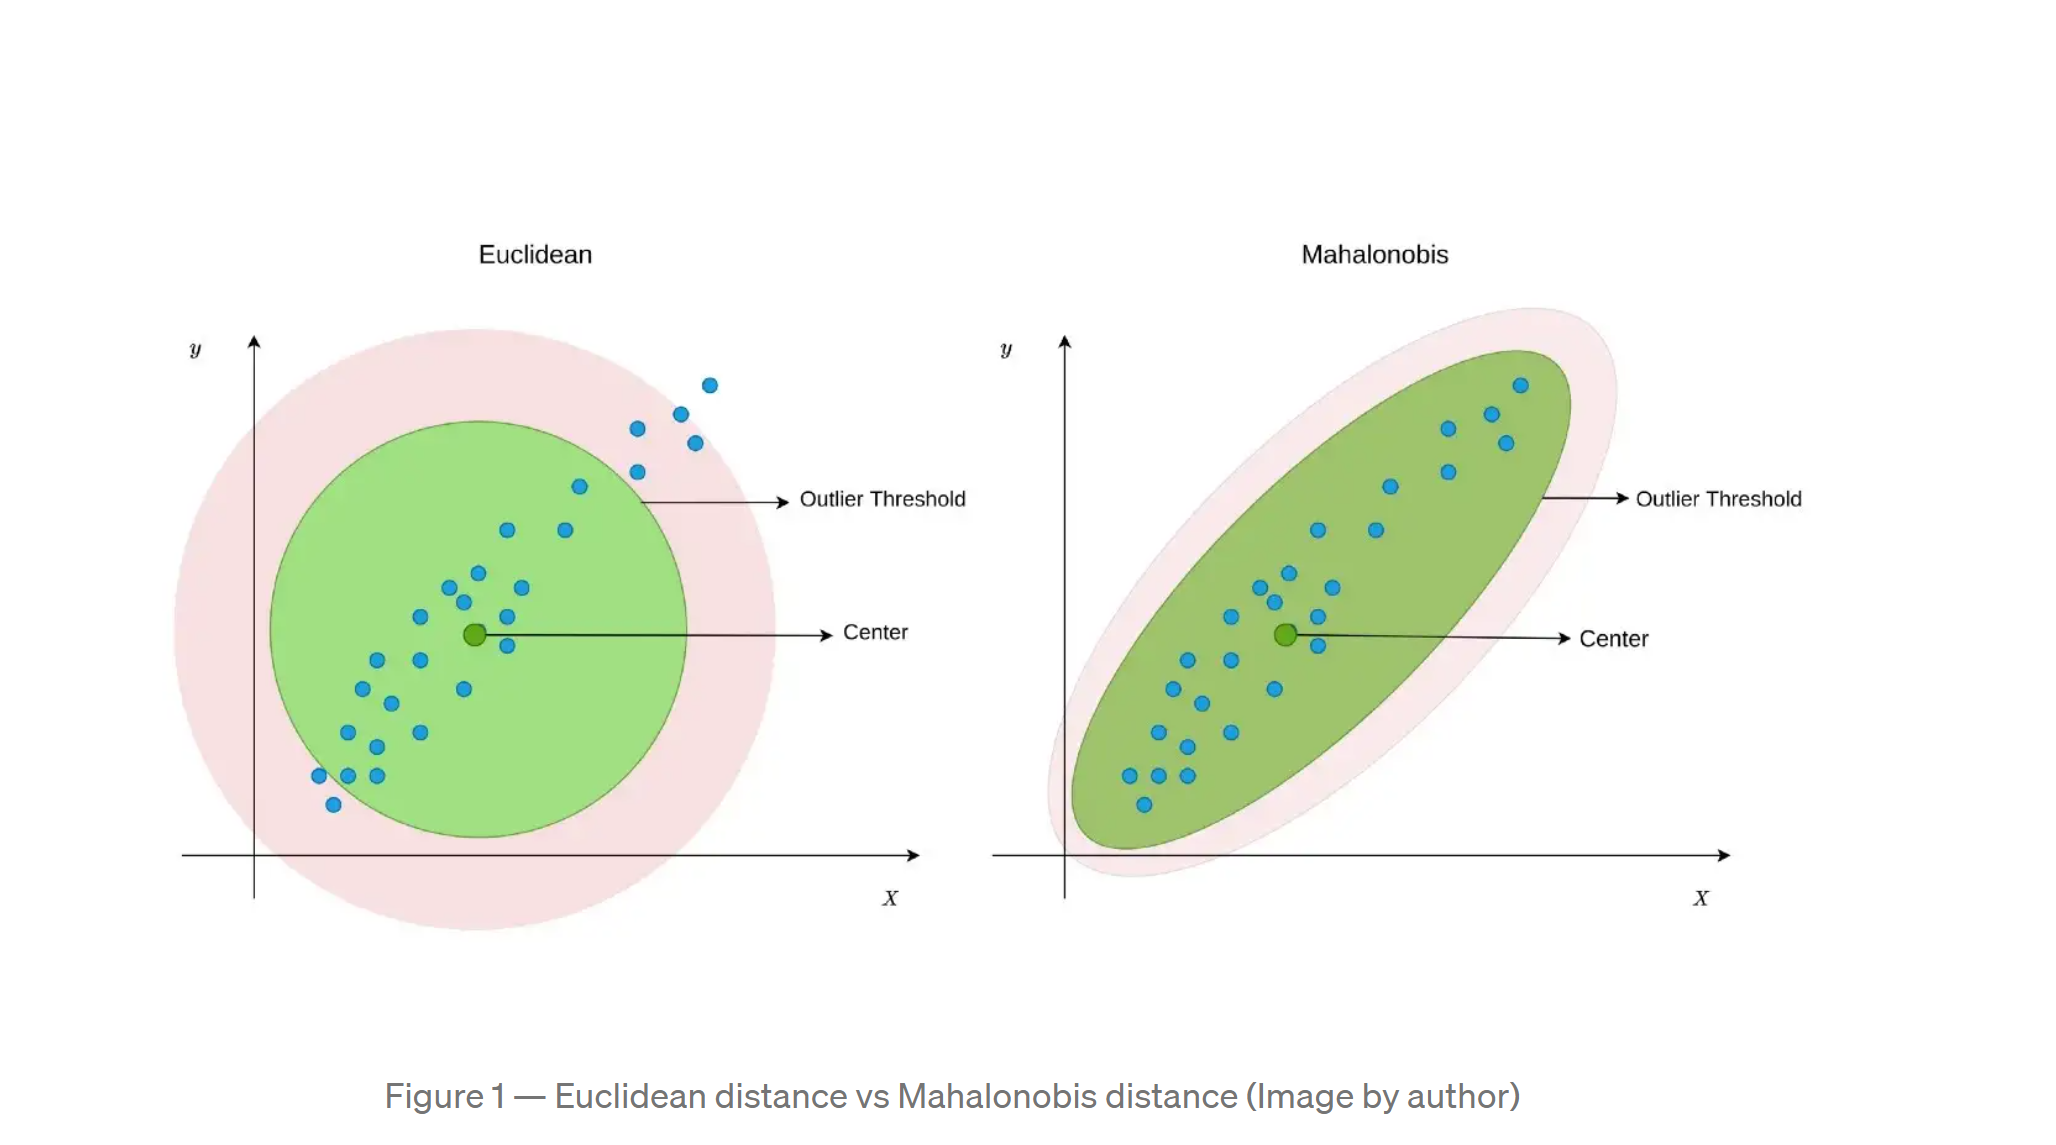

In [ ]:
# array of variances and covariances 
# ================================================================================================
from scipy.spatial import distance

df=df_r_credit[['person_age','person_income','person_emp_length','loan_amnt','loan_percent_income']]
df= df.to_numpy() # array

covariance  = np.cov(df , rowvar=False)
covariance

array([[ 4.03745861e+01,  6.82865212e+04,  4.19341605e+00,
         2.03609527e+03, -2.87089546e-02],
       [ 6.82865212e+04,  3.84593220e+09,  3.41922790e+04,
         1.04280016e+08, -1.68562120e+03],
       [ 4.19341605e+00,  3.41922790e+04,  1.67314652e+01,
         2.94662476e+03, -2.36032061e-02],
       [ 2.03609527e+03,  1.04280016e+08,  2.94662476e+03,
         3.99769177e+07,  3.86852579e+02],
       [-2.87089546e-02, -1.68562120e+03, -2.36032061e-02,
         3.86852579e+02,  1.14087977e-02]])

In [ ]:
#  inverse of array of covariances
covariance_pm1 = np.linalg.inv(covariance )
covariance_pm1

array([[ 2.60615536e-02, -4.38013728e-07, -5.76812871e-03,
         5.17153260e-07, -2.86036865e-02],
       [-4.38013728e-07,  3.88686053e-10, -9.61750291e-08,
        -2.27367282e-09,  1.33222513e-04],
       [-5.76812871e-03, -9.61750291e-08,  6.32559410e-02,
        -7.60002734e-06,  3.59846997e-01],
       [ 5.17153260e-07, -2.27367282e-09, -7.60002734e-06,
         5.18989112e-08, -2.11015372e-03],
       [-2.86036865e-02,  1.33222513e-04,  3.59846997e-01,
        -2.11015372e-03,  1.79559102e+02]])

In [ ]:
# mean of data
# ================================================================================================
centerpoint = np.mean(df , axis=0)
centerpoint

array([2.77470077e+01, 6.60916408e+04, 4.76887957e+00, 9.59384563e+03,
       1.70249877e-01])

In [ ]:
# Distance to the mean
# ================================================================================================
distances = []
for i, val in enumerate(df):
      p1 = val
      p2 = centerpoint
      distance = (p1-p2) @ covariance_pm1 @ (p1-p2)
      distances.append(distance)
distances = np.array(distances)
print(distances.shape)

(32416,)


In [ ]:
# cutoff Chi-Sqaure Distribution to detect outliers 
from scipy.stats import chi2 
cutoff = chi2.ppf(0.99, df.shape[1])
cutoff

15.08627246938899

In [ ]:
# outliers indexes
outlierIndexes = np.where(distances > cutoff )
print('------------------------------')
print('--- Indicador de atípicos ----')
print('------------------------------')
print(outlierIndexes)
print('------------------------------')
print('---Observacione atípicas------')
print('------------------------------')
print(df[ distances > cutoff , :])
np.delete(df,outlierIndexes)

------------------------------
--- Indicador de atípicos ----
------------------------------
(array([    0,     2,     3, ..., 32413, 32414, 32415]),)
------------------------------
---Observacione atípicas------
------------------------------
[[2.200e+01 5.900e+04 1.230e+02 3.500e+04 5.900e-01]
 [2.500e+01 9.600e+03 1.000e+00 5.500e+03 5.700e-01]
 [2.300e+01 6.550e+04 4.000e+00 3.500e+04 5.300e-01]
 ...
 [6.500e+01 7.600e+04 3.000e+00 3.500e+04 4.600e-01]
 [5.600e+01 1.500e+05 5.000e+00 1.500e+04 1.000e-01]
 [6.600e+01 4.200e+04 2.000e+00 6.475e+03 1.500e-01]]


array([5.900e+04, 2.100e+01, 1.000e-01, ..., 2.000e+00, 6.475e+03,
       1.500e-01])

In [ ]:
print(list(outlierIndexes))

[array([    0,     2,     3, ..., 32413, 32414, 32415])]


In [ ]:
# Calculation of the number of rows of the DF before deleting the outliers of the original base
# ================================================================================================
diferencia= df_r_credit.person_age.count()
diferencia

32416

In [ ]:
#Drop outliers from DF
# ================================================================================================
df_r_credit = df_r_credit.drop(df_r_credit.index[list(outlierIndexes)], axis=0)
df_r_credit

/usr/local/lib/python3.8/dist-packages/pandas/core/indexes/base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file
1,21,9600.00,OWN,5,EDUCATION,1,1000,False,0.10,False
5,21,9900.00,OWN,2,VENTURE,0,2500,True,0.25,False
9,21,10000.00,OWN,6,VENTURE,3,1600,True,0.16,False
19,24,10800.00,MORTGAGE,8,EDUCATION,1,1750,True,0.16,False
23,24,10980.00,OWN,0,PERSONAL,0,1500,False,0.14,False
...,...,...,...,...,...,...,...,...,...,...
32441,51,60000.00,MORTGAGE,8,PERSONAL,2,8000,False,0.13,True
32446,51,62046.00,RENT,8,VENTURE,0,8000,False,0.13,False
32455,51,52250.00,RENT,4,VENTURE,2,9200,False,0.18,False
32488,51,68000.00,RENT,5,PERSONAL,3,12000,False,0.18,False


In [ ]:
# Difference in the number of rows of the DF after deleting the outliers from the original base
# ================================================================================================
diferencia2= df_r_credit.person_age.count()
diferencia2

31198

In [ ]:
# % OF DROPS
# ================================================================================================
resta = diferencia - diferencia2
porcentaje_eliminados = (resta / diferencia) *100
print("{:.2f}".format(porcentaje_eliminados ), " %")


3.76  %


In [ ]:
df_r_credit.describe()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_percent_income
count,31198.00,31198.00,31198.00,31198.00,31198.00,31198.00
mean,27.29,62879.43,4.62,1.21,9293.20,0.17
std,5.36,34983.93,3.70,1.16,5862.47,0.10
min,20.00,4080.00,0.00,0.00,500.00,0.01
25%,23.00,38500.00,2.00,0.00,5000.00,0.09
50%,26.00,55000.00,4.00,1.00,8000.00,0.15
75%,30.00,78000.00,7.00,2.00,12000.00,0.23
max,51.00,294000.00,20.00,6.00,31825.00,0.57


# Categorical variables

In [ ]:
display((df_r_credit.person_home_ownership.value_counts(normalize = True) * 100).round(2))
print('--------------------------------------------------------')
display((df_r_credit.loan_intent.value_counts(normalize = True) * 100).round(2))
print('--------------------------------------------------------')
display((df_r_credit.loan_grade.value_counts(normalize = True) * 100).round(2))

RENT       50.90
MORTGAGE   40.95
OWN         7.81
OTHER       0.33
Name: person_home_ownership, dtype: float64

--------------------------------------------------------


EDUCATION           20.03
MEDICAL             18.66
VENTURE             17.52
PERSONAL            16.71
DEBTCONSOLIDATION   16.05
HOMEIMPROVEMENT     11.03
Name: loan_intent, dtype: float64

--------------------------------------------------------


0   33.23
1   32.06
2   19.91
3   11.04
4    2.86
5    0.71
6    0.19
Name: loan_grade, dtype: float64

about categorical variables:

home ownership
Intention of the credit requested
Credit grade, that is, the quality of the debt

In them we see that our users are almost all 50% rent their house, 40% have a mortgage almost 8% are owners.

The intention of the ccredit is distributed almost equally between each category.

Regarding the degree of quality of the debt. It is quite good since almost 65% is distributed between categories A and B, that is to say, the risk in terms of debt quality is low.

In [ ]:
#Graphs
cat_cols = ["person_home_ownership", "loan_intent", "loan_grade"]
fig = plt.figure(figsize=(10,12))  #defino el tamaño del grafico
gs = fig.add_gridspec(3,1)  #defino el numero de filas y columnas del grafico

ax0 = fig.add_subplot(gs[0,0], facecolor= 'white')
ax0.text(x=0.5, y=0.5, s="Observaciones p/OBJ", fontsize=24, fontweight='bold', horizontalalignment='center', verticalalignment='center')
ax0.tick_params(left=False, bottom=False)  #en estas 4 oraciones defino el titulo y la fuente y tamaño
ax0.set_xticklabels([]) #borra el ejex
ax0.set_yticklabels([]) #borra el eje y

ax1 = fig.add_subplot(gs[0, 0])  #defino el lugar que ocupa el Grafico para la columna 0 de cat_cols person_home_ownership
sns.countplot(x = cat_cols[0], data = df_r_credit, palette= "viridis")  #codigo para generar grafico

ax2 = fig.add_subplot(gs[1, 0])
sns.countplot(x = cat_cols[1], data =df_r_credit, palette= "viridis")

ax3 = fig.add_subplot(gs[2, 0])
sns.countplot(x = cat_cols[2], data = df_r_credit, palette= "viridis")

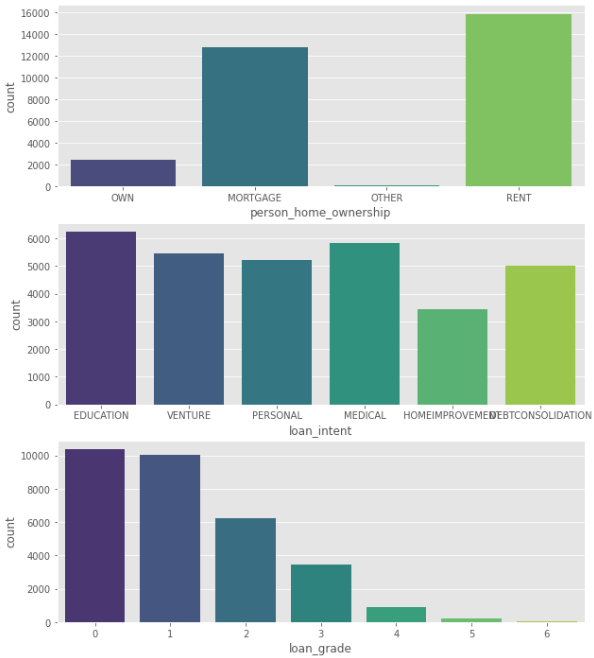

In [ ]:
#categorical and numeric variables
# ================================================================================================


cat_cols = [col for col in df_r_credit.columns if df_r_credit[col].dtypes == 'O']  #buscando columnas definidas como objetos
print(cat_cols)

['person_home_ownership', 'loan_intent']


In [ ]:
# Numeric and non-numeric data sets
cred_num = df_r_credit.select_dtypes(exclude=['object'])
cred_str = df_r_credit.select_dtypes(include=['object'])

In [ ]:
cred_str.describe()

,person_home_ownership,loan_intent
count,31198,31198
unique,4,6
top,RENT,EDUCATION
freq,15881,6248


In [ ]:
# Dummy coding to the set of categorical variables
cred_str_onehot = pd.get_dummies(cred_str)

# Union of numerical variables with coded ones
cr_loan = pd.concat([cred_num, cred_str_onehot], axis=1)

In [ ]:
cr_loan.describe()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_percent_income,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
count,31198.00,31198.00,31198.00,31198.00,31198.00,31198.00,31198.00,31198.00,31198.00,31198.00,31198.00,31198.00,31198.00,31198.00,31198.00,31198.00
mean,27.29,62879.43,4.62,1.21,9293.20,0.17,0.41,0.00,0.08,0.51,0.16,0.20,0.11,0.19,0.17,0.18
std,5.36,34983.93,3.70,1.16,5862.47,0.10,0.49,0.06,0.27,0.50,0.37,0.40,0.31,0.39,0.37,0.38
min,20.00,4080.00,0.00,0.00,500.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,23.00,38500.00,2.00,0.00,5000.00,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,26.00,55000.00,4.00,1.00,8000.00,0.15,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,30.00,78000.00,7.00,2.00,12000.00,0.23,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
max,51.00,294000.00,20.00,6.00,31825.00,0.57,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
cr_loan.shape

(31198, 18)

In [ ]:
cr_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31198 entries, 1 to 32492
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      31198 non-null  int64  
 1   person_income                   31198 non-null  float64
 2   person_emp_length               31198 non-null  int64  
 3   loan_grade                      31198 non-null  int8   
 4   loan_amnt                       31198 non-null  int64  
 5   loan_status                     31198 non-null  bool   
 6   loan_percent_income             31198 non-null  float64
 7   cb_person_default_on_file       31198 non-null  bool   
 8   person_home_ownership_MORTGAGE  31198 non-null  uint8  
 9   person_home_ownership_OTHER     31198 non-null  uint8  
 10  person_home_ownership_OWN       31198 non-null  uint8  
 11  person_home_ownership_RENT      31198 non-null  uint8  
 12  loan_intent_DEBTCONSOLIDATION   

In [ ]:
# columns
# ========================================================================================================
columnsreg = cr_loan.columns.tolist()

In [ ]:
len(columnsreg)

18

In [ ]:
columnsreg

['person_age',
 'person_income',
 'person_emp_length',
 'loan_grade',
 'loan_amnt',
 'loan_status',
 'loan_percent_income',
 'cb_person_default_on_file',
 'person_home_ownership_MORTGAGE',
 'person_home_ownership_OTHER',
 'person_home_ownership_OWN',
 'person_home_ownership_RENT',
 'loan_intent_DEBTCONSOLIDATION',
 'loan_intent_EDUCATION',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_intent_MEDICAL',
 'loan_intent_PERSONAL',
 'loan_intent_VENTURE']

# **MODELING**

#Logistic regression

In [ ]:
# Division of data into predictor and predicted variables: 
# =========================================================================================
# Independent and dependent variables
X = cr_loan.loc[:,cr_loan.columns != 'loan_status'] # Features
y = cr_loan ['loan_status'] # target o grupo

X_names=X.columns.tolist()


In [ ]:
X

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_percent_income,cb_person_default_on_file,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,21,9600.00,5,1,1000,0.10,False,0,0,1,0,0,1,0,0,0,0
5,21,9900.00,2,0,2500,0.25,False,0,0,1,0,0,0,0,0,0,1
9,21,10000.00,6,3,1600,0.16,False,0,0,1,0,0,0,0,0,0,1
19,24,10800.00,8,1,1750,0.16,False,1,0,0,0,0,1,0,0,0,0
23,24,10980.00,0,0,1500,0.14,False,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32441,51,60000.00,8,2,8000,0.13,True,1,0,0,0,0,0,0,0,1,0
32446,51,62046.00,8,0,8000,0.13,False,0,0,0,1,0,0,0,0,0,1
32455,51,52250.00,4,2,9200,0.18,False,0,0,0,1,0,0,0,0,0,1
32488,51,68000.00,5,3,12000,0.18,False,0,0,0,1,0,0,0,0,1,0


In [ ]:
# Train - Test
# =========================================================================================
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)
print('X_train: ', X_train.shape)
print('X_test: ',  X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)
print("y_train:",pd.value_counts(y_train))
print()
print("y_test:",pd.value_counts(y_test))

X_train:  (24958, 17)
X_test:  (6240, 17)
y_train:  (24958,)
y_test:  (6240,)
y_train: False    19604
True      5354
Name: loan_status, dtype: int64

y_test: False    4927
True     1313
Name: loan_status, dtype: int64


In [ ]:
# Building the model - scikitlearn
# ==============================================================================
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score, accuracy_score, f1_score, precision_score, recall_score  # métricas para evaluar
from sklearn.metrics import make_scorer
from numpy import mean, std
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
# score F2 ( https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)
def f2_score(y_true, y_pred):
	return fbeta_score(y_true, y_pred, beta=2)

def evaluate_model(X, y, model):
	# (fold/interaciones)
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
	# model evaluation metric
	metric = make_scorer(f2_score)
	# evaluation of model
	scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
	return mean(scores), std(scores)


In [ ]:
# MODEL WITH DEFAULT HYPERPARAMETERS
# ==============================================================================

logreg = LogisticRegression().fit(X_train, np.ravel(y_train))
y_pred = logreg.predict(X_test)

scores = evaluate_model(X_train, y_train, logreg)
print('Media F2: %.3f (%.3f)' % scores)


Media F2: 0.180 (0.016)


In [ ]:
# metrics of interest
a1 = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)
f2 = f2_score(y_test, y_pred)
p1 = precision_score(y_test, y_pred)
r1 = recall_score(y_test, y_pred)
print("accuracy score: %.3f" % a1)
print("f1 score: %.3f" % f1)
print("f2 score: %.3f" % f2)
print("precision score: %.3f" % p1)
print("recall score: %.3f" % r1)


accuracy score: 0.809
f1 score: 0.244
f2 score: 0.174
precision score: 0.730
recall score: 0.146


In [ ]:
# MODEL ALTERING HYPERPARAMETERS
# ================================================================================================
logreg = LogisticRegression(penalty='l1', C=10, solver='liblinear').fit(X_train, np.ravel(y_train))
y_pred = logreg.predict(X_test)

scores = evaluate_model(X_train, y_train, logreg)
print('Media F2: %.3f (%.3f)' % scores)


Media F2: 0.540 (0.018)


f2 get better. It comes from 0.1744 to 0.54

In [ ]:
#modify parameters with Gridsearch
# ================================================================================================
from sklearn.model_selection import GridSearchCV


In [ ]:
# define model
logreg = LogisticRegression()

# cross-validation "RepeatedStratifiedKFold" (10 folds and 3 repetciciones)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define the search space
# generate a dictionary that contains the following hyperparameters: solver, penalty, C
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

# define the metric that we will use ("make_scorer" function)
metric = make_scorer(f2_score)

# define the search by specifying the previous arguments: model, space, scoring, cv
# (additionally insert the argument n_jobs=-1; see the help of the function)
search = GridSearchCV(logreg, space, scoring=metric, n_jobs=-1, cv=cv)

# execute the search: use the "search.fit" function with the training sets
result = search.fit(X_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1440 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 464, in _check_solver
    raise ValueError("penalty='none' 

In [ ]:
# PARAMETERS THAT OPTIMIZE THE MODEL:
# ======================================================================

# summary of best model
print('Mejor Score: %.3f' % result.best_score_)
print('Mejores hiperparámetros: %s' % result.best_params_)


Mejor Score: 0.540
Mejores hiperparámetros: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
# Summary of results of each iteration
print("Best: %f using %s" % (result.best_score_, result.best_params_))
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%.3f (%.3f) con: %r" % (mean, stdev, param))


Best: 0.540005 using {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.535 (0.017) con: {'C': 1e-05, 'penalty': 'none', 'solver': 'newton-cg'}
0.179 (0.014) con: {'C': 1e-05, 'penalty': 'none', 'solver': 'lbfgs'}
nan (nan) con: {'C': 1e-05, 'penalty': 'none', 'solver': 'liblinear'}
nan (nan) con: {'C': 1e-05, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (nan) con: {'C': 1e-05, 'penalty': 'l1', 'solver': 'lbfgs'}
0.174 (0.013) con: {'C': 1e-05, 'penalty': 'l1', 'solver': 'liblinear'}
0.136 (0.014) con: {'C': 1e-05, 'penalty': 'l2', 'solver': 'newton-cg'}
0.179 (0.014) con: {'C': 1e-05, 'penalty': 'l2', 'solver': 'lbfgs'}
0.177 (0.013) con: {'C': 1e-05, 'penalty': 'l2', 'solver': 'liblinear'}
nan (nan) con: {'C': 1e-05, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan (nan) con: {'C': 1e-05, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan (nan) con: {'C': 1e-05, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.535 (0.017) con: {'C': 0.0001, 'penalty': 'none', 'solver': 'newton-cg'}


In [ ]:
# evaluate the model with the best hyper parameters 

logreg = LogisticRegression(penalty=result.best_params_['penalty'], C=result.best_params_['C'], solver=result.best_params_['solver'], class_weight = 'balanced').fit(X_train, np.ravel(y_train))
y_pred = logreg.predict(X_test)


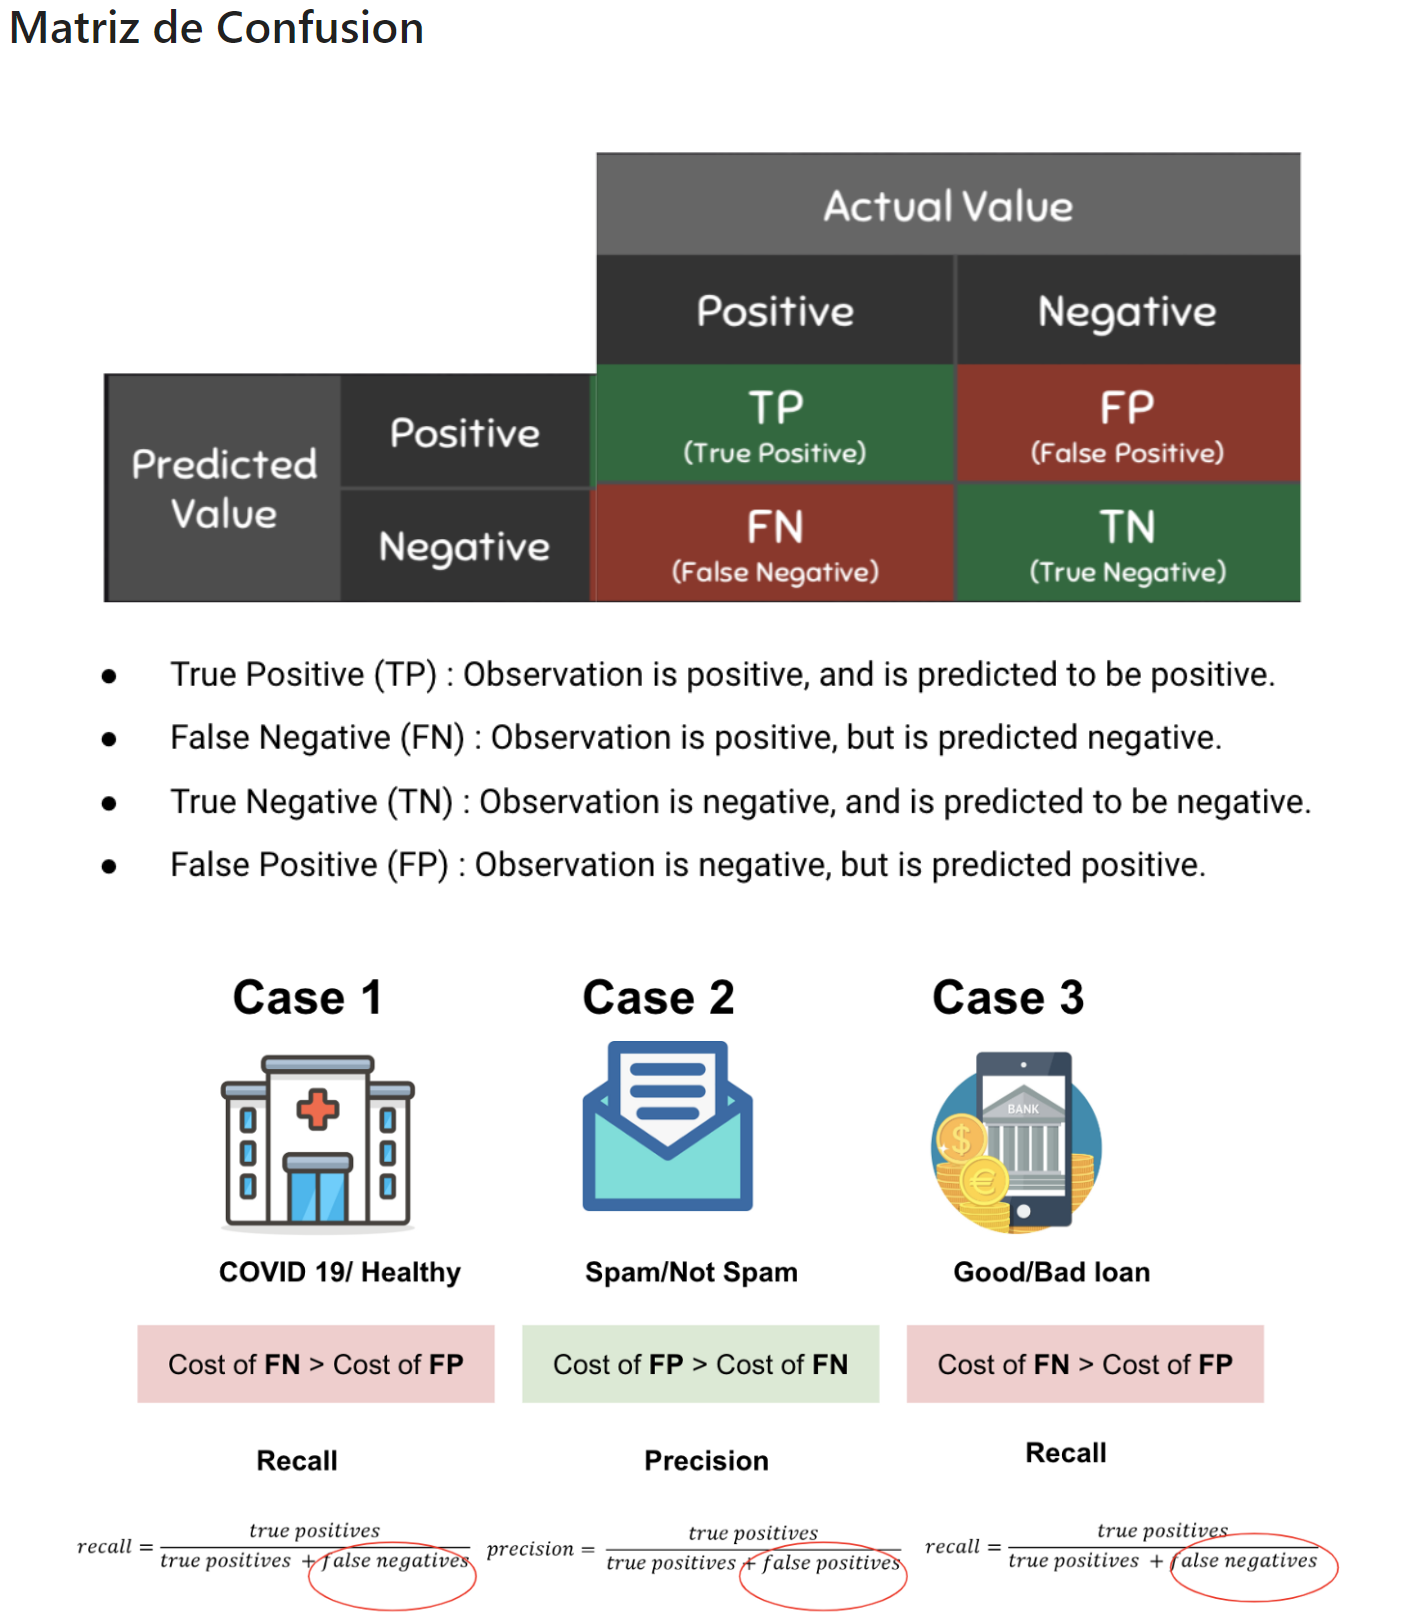

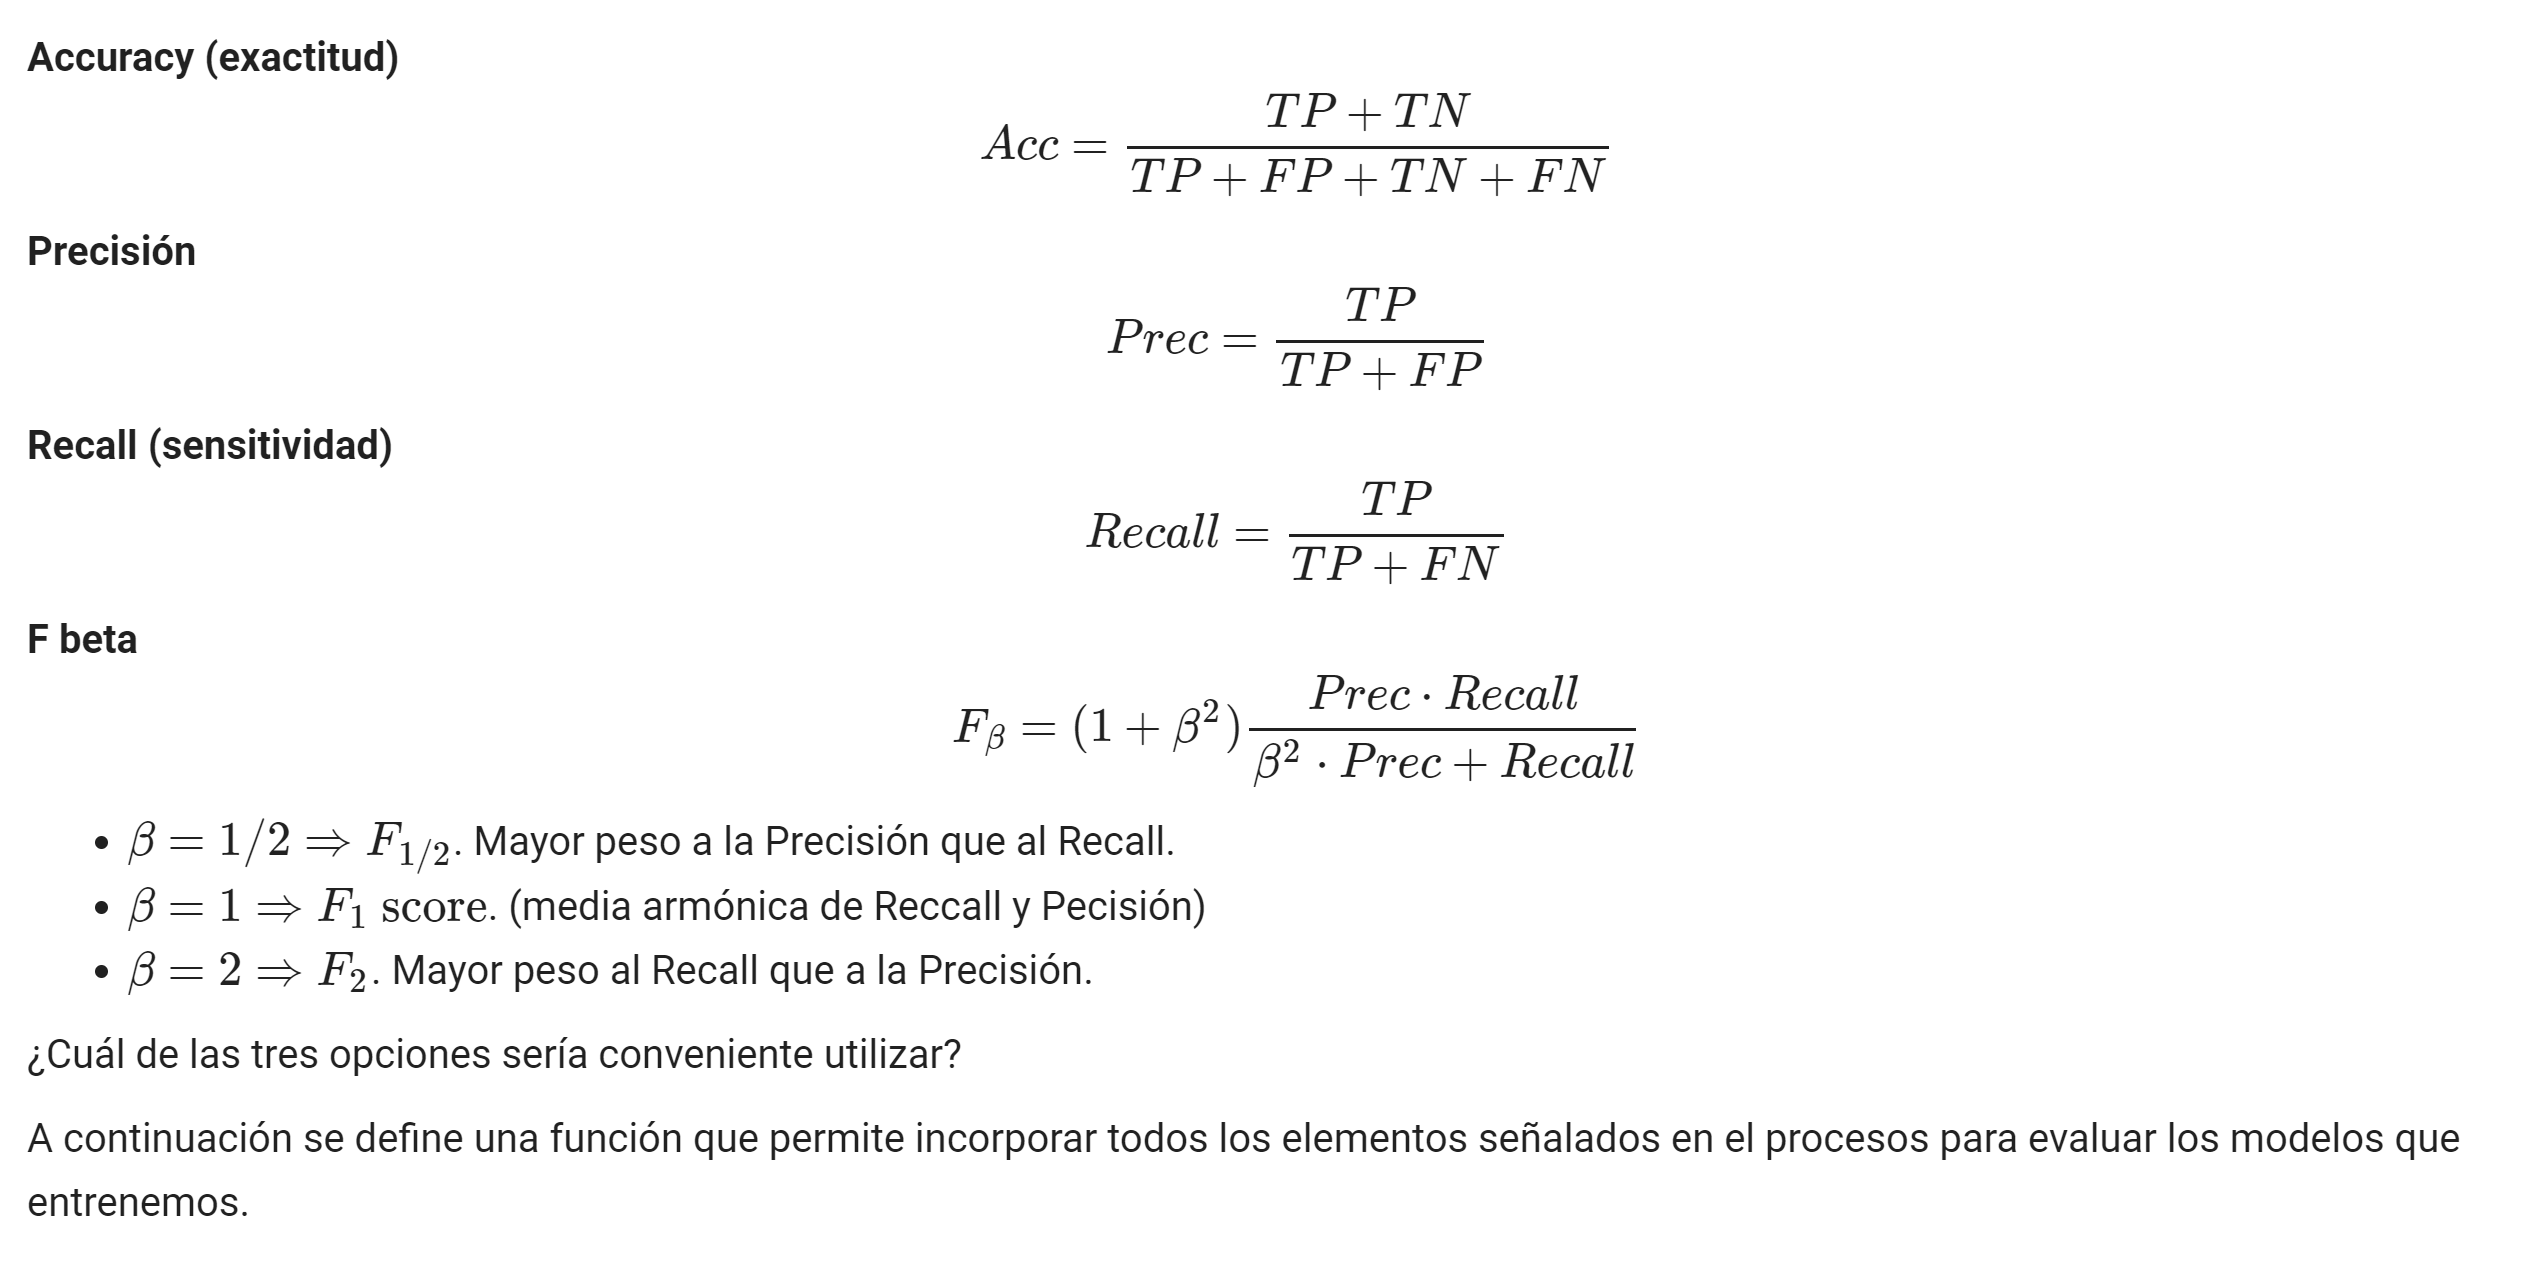

In [ ]:
a1 = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)
f2 = f2_score(y_test, y_pred)
p1 = precision_score(y_test, y_pred)
r1 = recall_score(y_test, y_pred)
print("accuracy score: %.3f" % a1)
print("f1 score: %.3f" % f1)
print("f2 score: %.3f" % f2)
print("precision score: %.3f" % p1)
print("recall score: %.3f" % r1)

accuracy score: 0.783
f1 score: 0.597
f2 score: 0.688
precision score: 0.490
recall score: 0.766


**Confusion Matrix**

It was predicted that almost all of our test set would not default AND MOST OF THE DEFAULTED CREDITS WERE ACHIEVED, OBJECTIVE OF THE MODEL.

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["no default", "default"])
disp.plot(cmap='inferno')
plt.ylabel('Observaciones')
plt.xlabel('Predicciones')
plt.title('Matriz de confusión')
plt.show()

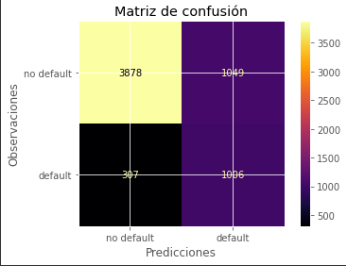

In [ ]:
# False positives 
total = cm.sum()
falsos_negativos = cm[1][0]
falsos_positivos = cm[0][1]
print("Falsos Negativos:", falsos_negativos)
print("Falsos Positivos:", falsos_positivos)
print("Total: ", total)
print("Porcentage Falsos Negativos: ", round((falsos_negativos / total) * 100, 2))
print("Porcentage Falsos positivos: ", round((falsos_positivos / total) * 100, 2))

Falsos Negativos: 307
Falsos Positivos: 1049
Total:  6240
Porcentage Falsos Negativos:  4.92
Porcentage Falsos positivos:  16.81


The model has a recall of **76.6%**.


It is very effective to detect defaults, there is only **4.92%** of the possible defaults that are not detected by the model, in contrast, there are **16.81%** of credits that are erroneously detected as default.

The model prioritizes detecting defaults at the cost of a higher percentage of false positives due to the risk of not detecting a default.

# Classification with the Perceptron algorithm

A basic version of the perceptron algorithm for binary classification will be implemented.

In [ ]:
from sklearn.linear_model import Perceptron

r = 1   # tasa de aprendizaje

# Definimos el modelo
model_per = Perceptron(eta0 = r)

# Ajustamos el modelo
model_per.fit(X_train, y_train)

# Predicción del modelo
y_pred = model_per.predict(X_test)

In [ ]:
# Metrics of interest

a1 = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)
f2 = f2_score(y_test, y_pred)
p1 = precision_score(y_test, y_pred)
r1 = recall_score(y_test, y_pred)
print("accuracy score: %.3f" % a1)
print("f1 score: %.3f" % f1)
print("f2 score: %.3f" % f2)
print("precision score: %.3f" % p1)
print("recall score: %.3f" % r1)

accuracy score: 0.790
f1 score: 0.003
f2 score: 0.002
precision score: 0.667
recall score: 0.002


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["no default", "default"])
disp.plot(cmap='inferno')
plt.ylabel('Observaciones')
plt.xlabel('Predicciones')
plt.title('Matriz de confusión')
plt.show()

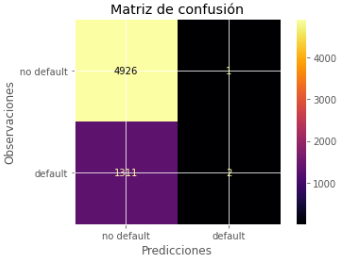

In [ ]:
# False positives
total = cm.sum()
falsos_negativos = cm[1][0]
falsos_positivos = cm[0][1]
print("Falsos Negativos:", falsos_negativos)
print("Falsos Positivos:", falsos_positivos)
print("Total: ", total)
print("Porcentage Falsos Negativos: ", round((falsos_negativos / total) * 100, 2))
print("Porcentage Falsos positivos: ", round((falsos_positivos / total) * 100, 2))

Falsos Negativos: 1311
Falsos Positivos: 1
Total:  6240
Porcentage Falsos Negativos:  21.01
Porcentage Falsos positivos:  0.02


The model has a recall of **0.002%**.

It is ineffective in detecting defaults, there is **21.01%** of possible defaults that are not detected by the model, in contrast, there is **0.02%** of credits that are erroneously detected as default.
We can verify that the logistic regression model yields better metrics than the perceptron model.

#DECISION TREES

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
# METRICS OF INTEREST
a1 = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)
f2 = f2_score(y_test, y_pred)
p1 = precision_score(y_test, y_pred)
r1 = recall_score(y_test, y_pred)
print("accuracy score: %.3f" % a1)
print("f1 score: %.3f" % f1)
print("f2 score: %.3f" % f2)
print("precision score: %.3f" % p1)
print("recall score: %.3f" % r1)


accuracy score: 0.896
f1 score: 0.692
f2 score: 0.601
precision score: 0.925
recall score: 0.553


In [ ]:
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(estimator=clf, X=X_test, y_true=y_test,  display_labels=["no default", "default"], cmap='inferno')
plt.ylabel('Observaciones')
plt.xlabel('Predicciones')
plt.title('Matriz de confusión')
plt.show()

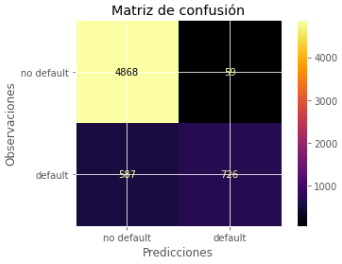

In [ ]:
# False positives
total = cm.sum()
falsos_negativos = cm[1][0]
falsos_positivos = cm[0][1]
print("Falsos Negativos:", falsos_negativos)
print("Falsos Positivos:", falsos_positivos)
print("Total: ", total)
print("Porcentage Falsos Negativos: ", round((falsos_negativos / total) * 100, 2))
print("Porcentage Falsos positivos: ", round((falsos_positivos / total) * 100, 2))

Falsos Negativos: 587
Falsos Positivos: 59
Total:  6240
Porcentage Falsos Negativos:  9.41
Porcentage Falsos positivos:  0.95


The model has a recall of **55.3%**.

---



It is effective for detecting defaults, there is **9.41%** of possible defaults that are not detected by the model, in contrast, there is **0.95%** of credits that are erroneously detected as default. We can verify that the model is quite good, but nevertheless we chose to prioritize the logistic regression model since it has a better recall index, f2 score and therefore a lower percentage of false negatives.
